# Практикум Python


<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" align="right" style="height: 200px;"/>

# Занятие 13. Визуализация данных. Matplotlib

# Почему важно смотреть на данные

![](https://alexanderdyakonov.files.wordpress.com/2017/11/d0bad180d0bed0bbd0b8d0ba_d183d182d0bad0b0.jpg)

Нельзя используя лишь статистические величины делать выводы о данных! 

Пример - [Квартет Энскомба](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0):

In [ ]:
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    '1': (x, y1),
    '2': (x, y2),
    '3': (x, y3),
    '4': (x4, y4)
}

In [ ]:
for label, (x, y) in datasets.items():
    print(f"Dataset {label}: N={len(x)}, x_mean={np.mean(x):.3f}, y_mean={np.mean(y):.3f}, x_std={np.std(x):.3f}, y_std={np.std(y):.3f}, r={np.corrcoef(x, y)[0][1]:.3f}")

Dataset 1: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.937, r=0.816
Dataset 2: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.937, r=0.816
Dataset 3: N=11, x_mean=9.000, y_mean=7.500, x_std=3.162, y_std=1.936, r=0.816
Dataset 4: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.936, r=0.817


Получили крайне близкие значения. Означает ли, что это наборы данных несут в себе одинаковые зависимости (выбраны из одного распределения)?

Посмотрим на график этих датасетов:

![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/01/Anscombes_quartet_2.png)

Видим кардинально разные зависимости, у которых при этом одинаковые статистические величины. С ними нужно работать по разному:
- набор 1: хорошо описывается линейной зависимостью
- набор 2: плохо описывается линейной зависимостью, скорее всего полином (парабола, полином 2й степени)
- набор 3: явный выброс, который плохо описывается линейной зависимостью
- набор 4: еще один выброс в данных, плохо ложится на линейную зависимость

# Matplotlib

**Matplotlib** - Python-библиотека для двумерной графики, созданная в 2003 году как альтернатива платному MATLAB'y. Проект оказался настолько успешным, что matplotlib является стандартом для двумерной графики в анализе данных на python. Используя matplotlib можно нарисовать очень сложные графики, поэтому порог входа у него высокий. Для простых графиков есть удобные обертки, но кастомизация требует понимания деталей.

## 1. Введение 

In [ ]:
import matplotlib as mpl  # стандартный алиас для matplotlib

Matplotlib состоит из множетства модулей и классов. Рисование в matplotlib состоит из последовательного нанесения объектов на холст. Объекты образуют иерархическую структуру. Задача пользователя описать эту структуру, а рисованием займется сама библиотека.

Рисунок в matplotlib имеет следующую структуру. 
1. объект рисунок (Figure)
2. в рисунке - холст(Canvas)
3. на холсте - области рисования (Axes).
4. в областях рисования - элементы рисунка (Artists)

Обычные пользователи большую часть времени занимаются тем что работают с элементами рисунка располагая их в нужном порядке на областях рисования. 

Элементы рисунка (Artists) можно разделить на две большие группы

 - **Примитивы** - простейшие элементы рисунка, такие как линии, прямоугольники, текст, изображения и т.д.
 - **Контейнеры** - рисунок (Figure), область рисования (Axes), координатные оси (Axis), деления на осях (Ticks).  

Библиотека манипулирует очень простыми графическими примитивами (линия, точка, отрезок, многоугольник).

Это совершенно неудобоно для людей - они мыслят высокоуровневыми абстракциями. Поэтому в matplotlib есть две обертки:
- **pylab** - "неудачный эксперимент", не используйте ее
- **pyplot** - "стандарт"

Подробнее про это - в [документации](https://matplotlib.org/2.0.2/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related).

In [ ]:
import matplotlib.pyplot as plt  # стандартный алиас для pyplot

Для того чтобы рисунки выводились в графический интерфейс надо вызвать [магическую команду](https://ipython.readthedocs.io/en/stable/interactive/magics.html) для jupyter 

In [ ]:
# (!) С какого-то релиза стала необязательной
%matplotlib inline

Также нам очень пригодится библиотека numpy для работы с многомерными массивами. С ее помощью можно быстро поэлементно применять математические функции и генерировать массивы.

In [ ]:
import numpy as np

[1 4 3 2 3 3 0 3 0 0 3 0 3 5 5 3 0 2 0 0]


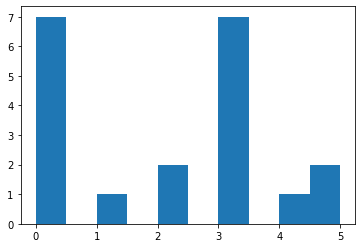

In [ ]:
# создать рисунок гистограммы из 20 рандомных чисел в диапазоне от 0 до 6 невключительно

array = np.random.randint(low=0, high=6, size=20)
print(array)

plt.hist(array) 

# Сохранить ПОСЛЕДНИЙ созданный рисунок
plt.savefig('hist.png', fmt='png')
# показать ВСЕ созданные рисунки
plt.show()

In [ ]:
test_array = np.random.randint(low=0, high=6, size=20)
test_array

array([3, 4, 0, 4, 2, 0, 5, 2, 5, 0, 2, 5, 0, 3, 4, 3, 5, 1, 4, 5])

(array([4., 0., 1., 0., 3., 0., 3., 0., 4., 5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

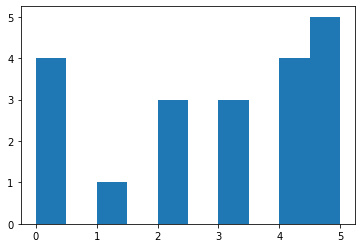

In [ ]:
plt.hist(test_array)

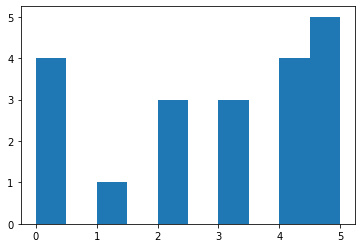

In [ ]:
plt.hist(test_array)
plt.show()

При вызове этих команд произошло приблизительно следующее:
1. Был создан рисунок (Figure).
2. В нем была создана одна область рисования (Axes).
3. На эту область были помещены оси X и Y (Axis) и 10 синих прямоугольников (Rectangle) 4 из которых нулевой высоты.
4. После этого у объекта рисунка вызвали методы savefig и show.

## 2. Основные функции модуля `matplotlib.pyplot`

Далее мы перечислим самые часто используемые функции из модуля matplotlib.pyplot. Примеры будут минималистичны, все настройки будут по умолчанию.

### 2.1 Примитивы

Точки (aka scatter plot):

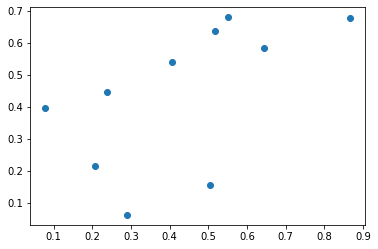

In [ ]:
plt.scatter(
    np.random.rand(10),  # абсциссы (координаты x) точек
    np.random.rand(10)  # ординаты (координаты y) точек
)
plt.show()

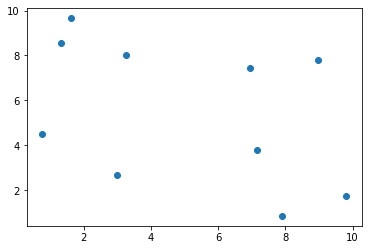

In [ ]:
plt.scatter(
    np.random.rand(10) * 10,  # абсциссы точек
    np.random.rand(10) * 10  # ординаты точек
)
plt.show()

Заплатки (патчи, [patches](https://matplotlib.org/3.1.1/api/patches_api.html)):

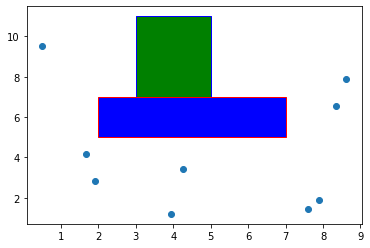

In [ ]:
import matplotlib.patches as mpatches

figure, ax = plt.subplots(1)

rect1 = mpatches.Rectangle((2, 5), 5, 2, edgecolor='r', facecolor="b")
rect2 = mpatches.Rectangle((3, 6), 2, 5, edgecolor='b', facecolor="g")

#print(dir(rect))

ax.scatter(
    np.random.rand(10) * 10,  # абсциссы точек
    np.random.rand(10) * 10  # ординаты точек
)

ax.add_patch(rect2)
ax.add_patch(rect1)


plt.show()

Ломаная линия:

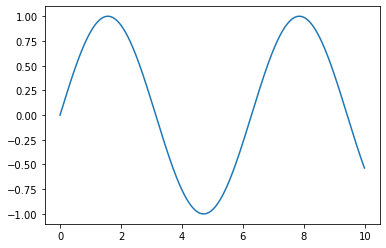

In [ ]:
plt.plot(
    np.arange(0, 10, 0.01),  # абсциссы точек
    np.sin(np.arange(0, 10, 0.01))  # ординаты точек
)
plt.show()

Текст:

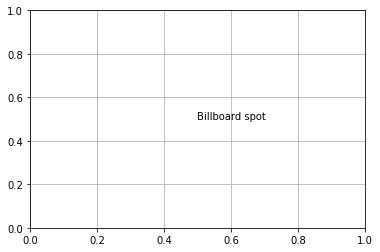

In [ ]:
plt.text(
    0.5,  # Абсцисса начала текста в координатах графика
    0.5,  # Ордината начала текста в координатах графика
    'Billboard spot'  # собственно ваш текст
)

plt.grid()
plt.show()

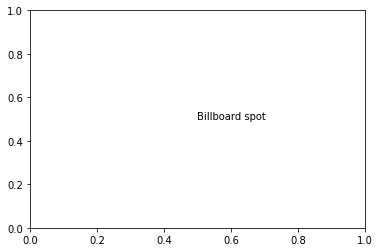

In [ ]:
plt.text(0.5, 0.5, 'Billboard spot')
plt.show()

### 2.2. Диаграммы

Столбцовая диаграмма:

[0 8 5 8 3 0 4 9 8 3]


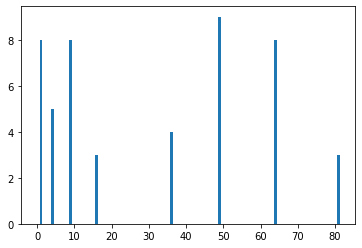

In [ ]:
height = np.random.randint(low=0, high=10, size=10)
print(height)

plt.bar(
    np.arange(10) ** 2,  # Позиции столбцов
    height  # Высоты столбцов
)
#plt.text(50, 5, 'Billboard spot')
plt.show()

Гистограмма:

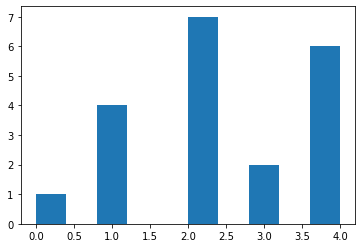

In [ ]:
array = np.random.randint(low=0, high=5, size=20)
plt.hist(array)
plt.show()

Круговая диаграмма:

[ 1  2  3  4  5  6  7  8  9 10]


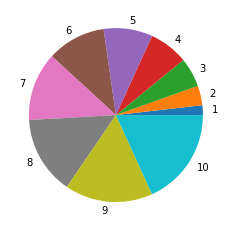

In [ ]:
plt.pie(
    np.arange(1, 11),
    labels=list(map(str, range(1,11)))
)
plt.show()

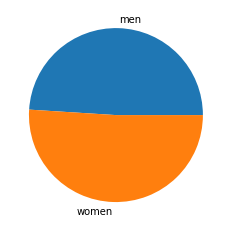

In [ ]:
plt.pie(
    np.array([490, 510]),
    labels=['men', 'women']
)
plt.show()

[Ящик с усами](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8):
- ящик показывает диапазон от 25 до 75 квантиля (1й и 3й квартили)
- черта в ящике - медиана
- усы - квартили +- 1.5 межквартильного размаха (IQR)
- круглые точки - "выбросы"

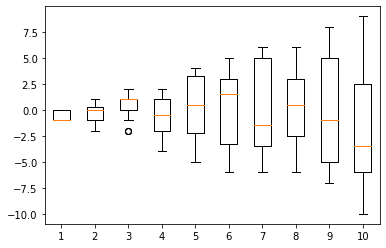

In [ ]:
plt.boxplot(
    [
        np.random.randint(low=-i, high=i, size=20) # Значения по которым строится ящик №i
        for i in range(1, 11)
    ]
)
plt.show()

Ломаная с "крестами ошибок" - в каждой точке графика откладываются ошибки измерений по абсциссе и ординате:

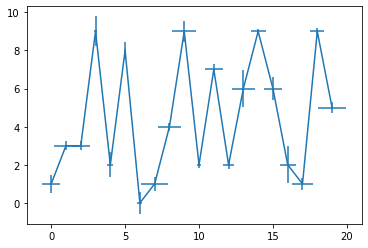

In [ ]:
plt.errorbar(
    np.arange(20),  # абсциссы точек 
    np.random.randint(low=0, high=10, size=20),  # ординаты точек  
    xerr=np.random.rand(20),  # ошибки расположения каждой точки по оси x
    yerr=np.random.rand(20)  # ошибки расположения каждой точки по оси y
)
plt.show()

### 2.3. Отображения

Цветовое представление двумерного массива (heatmap):

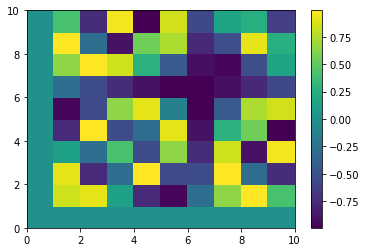

In [ ]:
# # Построить цветовую карту
color_map = plt.pcolormesh(
    np.sin(np.outer(np.arange(10), np.arange(10)))  # двумерный массив значений
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()

In [ ]:
np.outer(np.arange(10), np.arange(10))

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

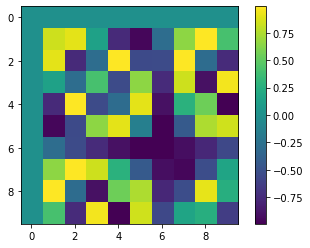

In [ ]:
# Построить цветовую карту
color_map = plt.imshow(
    np.sin(np.outer(np.arange(10), np.arange(10)))  # рандомное RGB - изображение, цветовые каналы представлены числaми из [0,1]
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()

А в чём разница?

- `imshow` представляет ячейки как обязательно квадратные, может работать с тремя каналами
- `pcolormesh` может рисовать ячейки разных форм

In [ ]:
X = np.array([[0, 1, 3.5, 4.5],
              [0, 1, 4, 5],
              [0, 1, 4, 5.5],
              [0, 1, 3.5, 5.5]])
Y = np.array([[0, 0, 0, 0.125],
              [1, 1, 1, 1.25],
              [2, 2, 2, 2.5],
              [3, 3, 3, 3]])

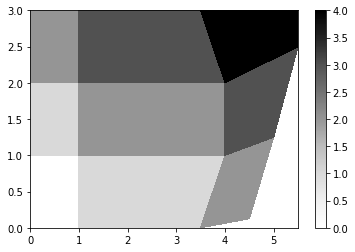

In [ ]:
color_map = plt.pcolormesh(
    X, Y,
    np.arange(4)[:, None] + np.arange(4)[None, :],
    cmap='Greys'
)

plt.colorbar(color_map)
plt.show()

In [ ]:
np.arange(4)[:, None] + np.arange(4)[None, :]

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

### 2.4. Контурные рисунки

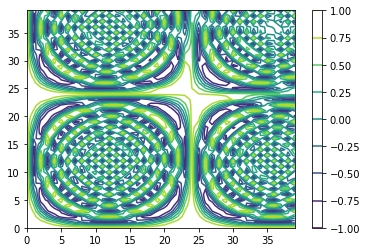

In [ ]:
# Строим контурное изображение
contours = plt.contour(
    np.cos(  # Возьмем чтобы было весело
        np.outer(  # умножаем колонку на столбец чтобы получить матрицу
            np.linspace(start=0, stop=20, num=40),  # сгенерировать равномерную сетку из 40 точек на отрезке [0, 20]
            np.linspace(start=0, stop=20, num=40)
        )
    )
)
# Добавляем шкалу
plt.colorbar(contours)
plt.show()

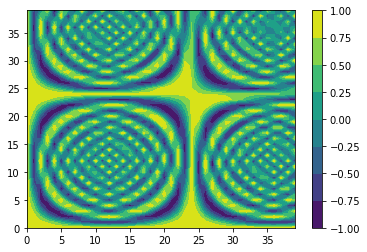

In [ ]:
# Строим контурное изображение c заливкой
contours = plt.contourf(
    np.cos(
        np.outer(
            np.linspace(start=0, stop=20, num=40),
            np.linspace(start=0, stop=20, num=40)
        )
    )
)
# Добавляем шкалу
plt.colorbar(contours)
plt.show()
del contours

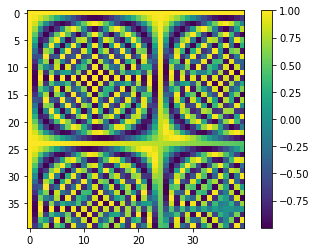

In [ ]:
# Построить цветовую карту
color_map = plt.imshow(
    np.cos(
        np.outer(
            np.linspace(start=0, stop=20, num=40),
            np.linspace(start=0, stop=20, num=40)
        )
    )
)
# Добавить к ней столбец с объяснением соответствия между цветом и величиной хранимой в массиве
plt.colorbar(color_map)
plt.show()

### 2.5. Заливка

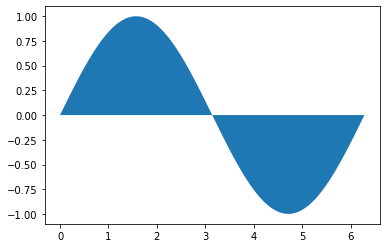

In [ ]:
# Простейшая заливка - заливается область между графиком функции и осью абсцисс
plt.fill(
    np.linspace(start=0, stop=2*np.pi, num=100),  # абсциссы точек
    np.sin(np.linspace(start=0, stop=2*np.pi, num=100))  # ординаты точек
)
plt.show()

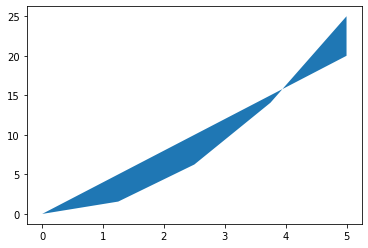

In [ ]:
# Заливка между двумя графиками функций
plt.fill_between(
    np.linspace(0, 5, 5),  # абсциссы точек
    np.linspace(0, 5, 5) ** 2,  # ординаты первой кривой 
    np.linspace(0, 5, 5) * 4  # ординаты второй кривой
)
plt.show()

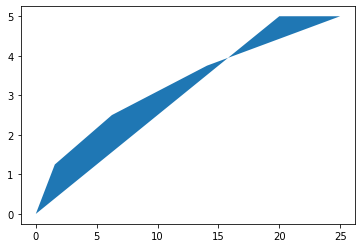

In [ ]:
# Заливка между двумя графиками функций
plt.fill_betweenx(
    np.linspace(0, 5, 5),  # ОРДИНАТЫ точек
    np.linspace(0, 5, 5) ** 2,  # АБСЦИССЫ первой кривой 
    np.linspace(0, 5, 5) * 4  # АБСЦИССЫ второй кривой
)
plt.show()

### 2.5 Векторные диаграммы

In [ ]:
import numpy as np

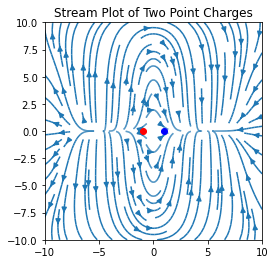

In [ ]:
# Векторный поток

# Готовим координатную сетку

x = np.linspace(-10, 10, 4)
y = np.linspace(-10, 10, 4)


X,Y = np.meshgrid(x,y)
Ex = (X + 1) / ((X + 1) ** 2 + Y ** 2) - (X - 1) / ((X - 1) ** 2 + Y**2)
Ey = Y / ((X + 1) ** 2 + Y ** 2) - Y / ((X - 1) ** 2 + Y**2)

fig, ax = plt.subplots()
ax.streamplot(X, Y, Ex, Ey)

ax.set_aspect('equal')  # Соотношение сторон
ax.plot(-1,0,'-or')
ax.plot(1,0,'-ob')
ax.set_title('Stream Plot of Two Point Charges')

plt.show()

In [ ]:
X

array([[-10.        ,  -3.33333333,   3.33333333,  10.        ],
       [-10.        ,  -3.33333333,   3.33333333,  10.        ],
       [-10.        ,  -3.33333333,   3.33333333,  10.        ],
       [-10.        ,  -3.33333333,   3.33333333,  10.        ]])

In [ ]:
Y

array([[-10.        , -10.        , -10.        , -10.        ],
       [ -3.33333333,  -3.33333333,  -3.33333333,  -3.33333333],
       [  3.33333333,   3.33333333,   3.33333333,   3.33333333],
       [ 10.        ,  10.        ,  10.        ,  10.        ]])

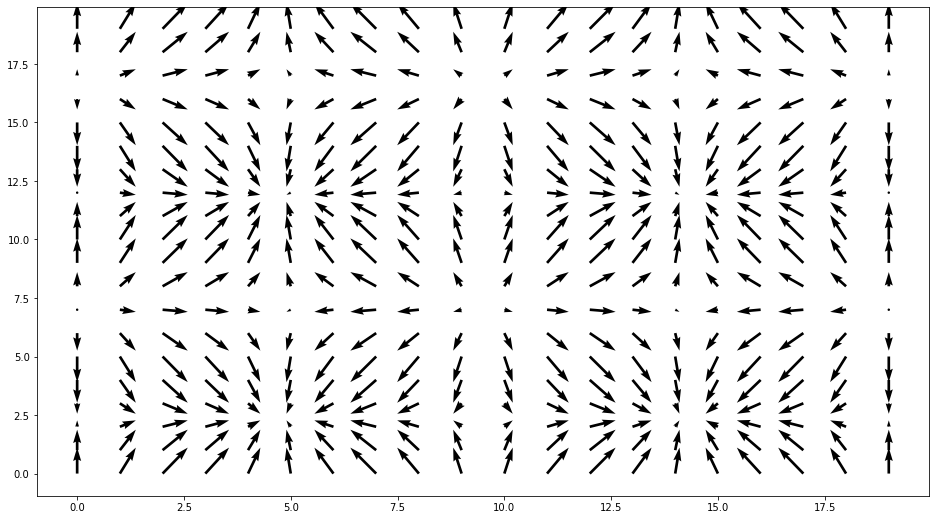

In [ ]:
# Векторное поле

# Готовим координатную сетку
n_points = 20
plt.figure(figsize=(16, 9))
x = np.linspace(-2*np.pi, 2*np.pi, n_points)
y = np.linspace(-2*np.pi, 2*np.pi, n_points)

# Координаты векторов в координатной сетке
vx, vy = np.meshgrid(np.sin(x), np.cos(y))
plt.quiver(vx, vy)
plt.show()
del n_points, x, y, vx, vy

Ну что же, это было краткое введение. Его достаточно для рисования большинства графиков, но это конечно же не все, что может matplotlib. Так что советую продолжить чтение.

## 3. Сложные примеры

### 3.1. Работа с текстом

Разберем пример показывающий какие элементы рисунка могут быть на области рисования и какие у них могут быть настройки. Мы нарисуем рисунок на котором будет
 - одна область рисования
 - заголовок рисунка
 - заголовок графика
 - график функции $\cos(x^2)$
 - аннотация
 - текст в рамке
 - подписи к осям X и Y
 - легенда
 - координатная сетка
 
Все именованные параметры функций являются опциональными. Поудаляйте их чтобы увидеть как по умолчанию отображаются эти элементы.

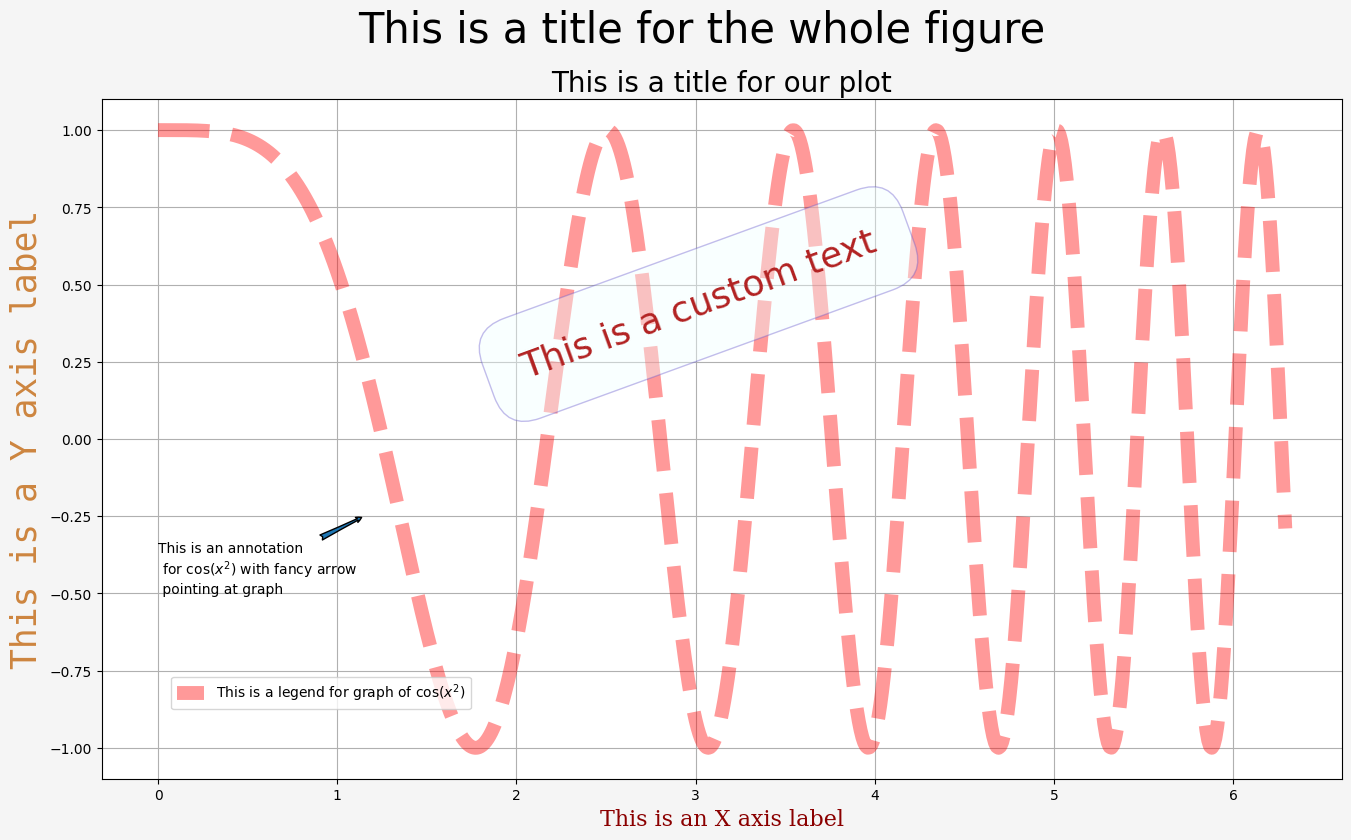

In [ ]:
#  Генерируем данные
step = 0.01
# создать массив чисел от 0 до 2pi с шагом 0.01
x = np.arange(0.0, 2*np.pi + step, step)
#  посчитать cos(x^2) от полученной сетки x'ов
y = np.cos(x * x)

# Создать рисунок 
fig = plt.figure(
    figsize=(16, 9),  # размером 16 на 9 дюймов
    facecolor='whitesmoke',  # c подложкой цвета белый дым
    dpi=100  # разрешением 200 точек
)

# Добавить заголовок рисунка с 30-м шрифтом
plt.suptitle('This is a title for the whole figure', fontsize=30)

# Добавить заголовок графика
plt.title('This is a title for our plot', fontsize=20)

# Нарисовать cos(x^2)
plt.plot(
    x, y,
    color='red',  # Цвет пурпурный
    linestyle='--',  # Стиль - пунктирная линия
    alpha=0.4,  # Непрозрачность
    linewidth=10,  # Толщина
    label='This is a legend for graph of $\cos(x^2)$' # Подпись в легенде. Можно использовать TeX!
)

# Добавим аннотацию
plt.annotate(
    'This is an annotation\n for $\cos(x^2)$ with fancy arrow\n pointing at graph',
    xy=(1.15, -0.25),  #  точка куда будет указывать стрелка
    arrowprops=dict(arrowstyle='fancy'),
    xytext=(0, -0.5)  # расположение аннотации
)

# Поставить легенду
plt.legend(
    loc='lower left',  # Снизу слева
    borderaxespad=5  # С отступом 5 от осей
)

# Добавить подписи к осям X и Y
plt.xlabel(
    'This is an X axis label',  # Текст
    fontdict=dict(family='serif', color='darkred', weight='normal', size=16)  # Настройки шрифта
)
plt.ylabel(
    'This is a Y axis label',
    fontdict=dict(family='monospace', color='peru', weight='light', size=25)
)

# Добавить текст
plt.text(
    2.0, 0.2,  # Позиция начала текста
    'This is a custom text',  # Собственно сам текст
    fontsize=26,  # Размер шрифта
    color='firebrick',  # Цвет букв
    rotation=20,
    bbox=dict(  # Параметры рамки ограничивающей текст
        alpha=0.4, # Прозрачность фона рамки
        edgecolor='slateblue',  # цвет рамки
        facecolor='azure',  # цвет подложки
        pad=1., # отступ рамки от текст
        boxstyle='round'  # форма рамки
    )
)

# Добавить координатную сетку
# Получающиеся вертикальные линии это Xticks, а горизонтальные Yticks
plt.grid(True)

plt.show()
del step, x, y, fig

### 3.2. Полярные координаты

Область рисования может быть непрямоугольной, напрмер если вы используете полярные координаты. В этом случае вам придется самостоятельно создать область рисования. Мы создадим ее методом add_axes указав размеры прямоугольника в котором будет находится область рисования. Тут стоит сказать, что на рисунке действуют относительные координаты, в диапазоне от 0 до 1. В этом примере мы будем использовать более объектно ориентированный подход и будем вызывать методы объектов, а не функции модуля plt. Использовать функции модуля plt считается плохим тоном так как вы постоянно оперируете глобальным состоянием к которому еще и не имеете доступа.

In [ ]:
len(np.arange(0.0, 2 * np.pi + .01, .01))

630

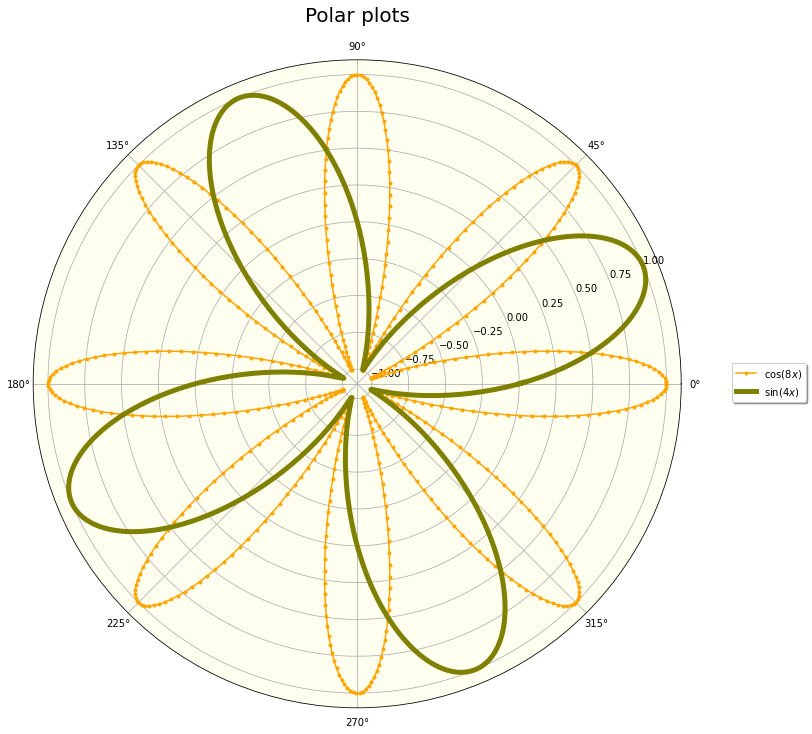

In [ ]:
# Готовим данные
step = 0.01
phi = np.arange(0.0, 2*np.pi + step, step)
rho1 = np.cos(8 * phi)
rho2 = np.sin(4 * phi)

fig = plt.figure(figsize=(16, 9))
# Создать область рисования для полярных координат с подложкой цвета слоновой кости :)
# Левый нижний угол будет в точке (0,0)
# Ширина и высота соответственно 1 и 1 (то есть на весь рисунок)
ax = fig.add_axes([0,0,1,1], polar=True, facecolor='ivory')

ax.set_title('Polar plots', fontsize=20)

ax.plot(
    phi, rho1,
    color='orange', 
    marker='o',  # Добавить круглые метки в тех точках по которым строилась линия
    markersize=3,  #  Размер меток
    label='$\cos(8x)$'
)

ax.plot(
    phi, rho2,
    linewidth=5,
    color='olive',
    label='$\sin(4x)$'
)

# Раз мы указали label, то надо сделать легенду
ax.legend(
    bbox_to_anchor=(1.2, 0.54),  # кастомное положение легенды
    fancybox=True,
    shadow=True
)

ax.grid(True)

plt.show()
del step, phi, rho1, rho2, fig, ax

### 3.3. Разные типы графиков на одном рисунке

Мы нарисуем 
 - набор случайных измерений функци $cos(x)$ к которому добавив белый шум с нулевым средним и дисперсией 0.25
 - собственно график cos(x)
 - и область в которой лежат изменения отстоящие не более чем на 1 сигму

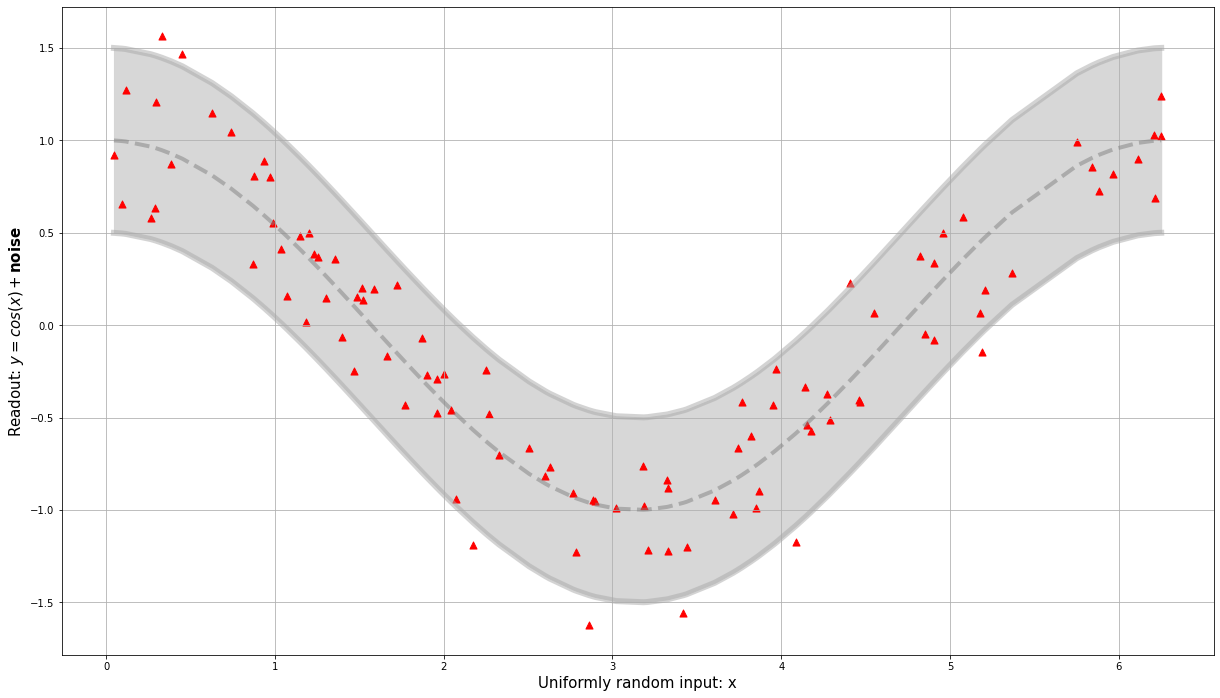

In [ ]:
# Готовим данные
scale = 0.5
n_points = 100
x = 2 * np.pi * np.sort(np.random.rand(n_points))
y = np.cos(x)
y_noise = y + np.random.normal(scale=0.25, size=n_points)

# Готовим рисунок
fig = plt.figure(figsize=(16, 9))
# Готовим область рисования.
ax = fig.add_axes([0, 0, 1, 1])  

# График самой функции cos(x)
ax.plot(
    x, y,
    color='grey',
    linestyle='--',
    alpha=0.5,
    linewidth=4
)

# Графики отклоненний на 1 сигму
for shift in (scale, -scale):
    ax.plot(
        x, y + shift,
        alpha=0.5,
        color='darkgrey',
        linewidth=6
    )

# Сделаем заливку всего что находится между отклонениями
ax.fill_between(
    x, y - scale, y + scale,
    alpha=0.9,
    color='lightgrey',
)

# Собственно scatter plot
ax.scatter(
    x, y_noise,
    marker='^',  # Отмечаем точки треугольниками
    s=50,  # Размера 50
    color='red'  #  Красного цвета
)

# Подпишем оси
ax.set_xlabel('Uniformly random input: x', fontsize=15)
ax.set_ylabel('Readout: $y=cos(x)+\mathbf{noise}$', fontsize=15)
    
ax.grid(True)

plt.show()
del scale, n_points, x, y, y_noise, fig, ax

Как вы видели по последним примерам большая часть рисования происходит через работу с областью рисования (Axes). Этот объект-контейнер содержит в себе другие контейнеры и объекты-примитивы. Видно, что существует множество методов для создания и изменения свойств элементов рисунков и графических примитивов. Всё, что можно сделать через pyplot, можно сделать работая непосредственно с axes-экземплярами. Получаются такие соответствия:

Метод объекта Axes -> Краткое описание -> объект типа Artist создаваемый методом -> Контейнер в котором будет храниться Artist

    ax.annotate -> текстовая подпись -> Annotate -> ax.texts

    ax.text -> текст -> Text -> ax.texts

    ax.bar -> столбчатая диаграмма -> Rectangle -> ax.patches

    ax.errorbar -> график погрешностей -> Line2D и Rectangle -> ax.lines и ax.patches

    ax.fill -> заливка области -> Polygon -> ax.patches

    ax.hist -> гистограмма -> Rectangle -> ax.patches

    ax.imshow -> изображение -> AxesImage -> ax.images

    ax.legend -> легенда -> Legend -> ax.legends

    ax.plot -> XY график -> Line2D -> ax.lines

    ax.scatter -> точечная диаграмма -> PolygonCollection -> ax.collections


### 3.4. Несколько областей рисования

Зачастую необходимо расположить несколько областей на одном графике. Для этого надо создать несколько областей рисования и работать с каждой в отдельности. В следующем примере мы нарисуем график функции $x^2(2+\sin(1/x))$ и добавим еще одну область рисования для самой интересной части графика

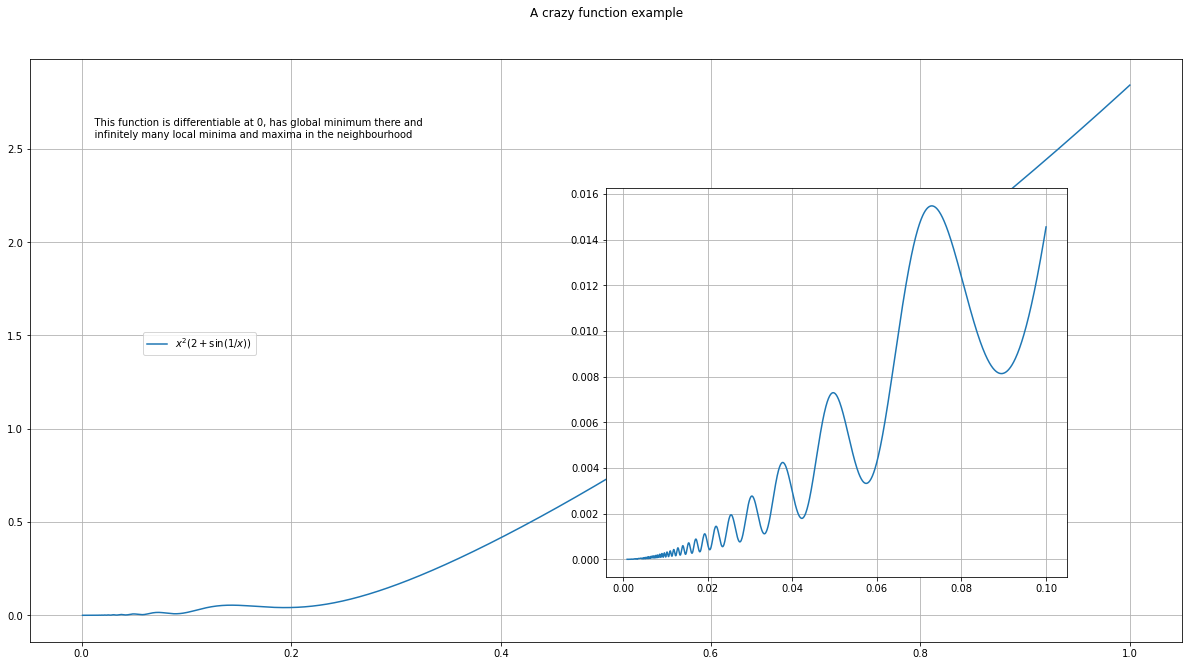

In [ ]:
def crazy_func(x):
    return x * x * (2 + np.sin(1 / x))

fig = plt.figure(figsize=(16, 9))

fig.suptitle('A crazy function example')

# Нарисуем основной график
big_ax = fig.add_axes([0, 0, 1, 0.9])
big_ax.plot(
    np.linspace(0.001, 1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 1, 1000)),
    label='$x^2(2+\sin(1/x))$'
)

big_ax.text(
    0, 2.5,
    '''
    This function is differentiable at 0, has global minimum there and 
    infinitely many local minima and maxima in the neighbourhood
    '''
)

big_ax.legend(bbox_to_anchor=(0.2, 0.54))
big_ax.grid(True)

# Нарисуем вспомогательный график
small_ax = fig.add_axes([0.5, 0.1, 0.4, 0.6])
small_ax.plot(
    np.linspace(0.001, 0.1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 0.1, 1000))
)
small_ax.grid(True)


plt.show()
#del crazy_func, fig, big_ax, small_ax

### 3.5. Мультиокна

В предыдущем примере мы создали две области рисования, но их расположение пришлось задавать явно с помощью координат. В большинстве случаев такой точный уровень настройки не нужен. Для этого в matplotlib существуют мультиокна. Во многом они похожи на области рисования. Создавать их можно из объекта Figure с помощью метода add_subplots. 

При использовании метода add_subplots рисунок разбивается как таблица на некоторое число строк и столбцов. Возникающие ячейки нигде не рисуются - это удобная абстракция. Далее можно выбрать одну из этих ячеек, и рисовать в ней. Чтобы сделать это надо в функцию subplots передать три числа или трехзначное число. Первая цифра указывает количество строк, вторая - столбцов, третья - порядковый номер ячейки в которой вы хотите рисовать (нумерация начинается с 1 идет слева направо и сверху вниз). Например, вызов fig.add_subplots(3, 3, 7) разобъет рисунок на 9 равных частей и вернет вам ячейку из нижнего левого угла. 

Преимущество подхода в том, что вы получаете области рисования одинакового размера не задумываясь о том какие должны быть у них координаты.

[Фигуры Лиссажу](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%B3%D1%83%D1%80%D1%8B_%D0%9B%D0%B8%D1%81%D1%81%D0%B0%D0%B6%D1%83)

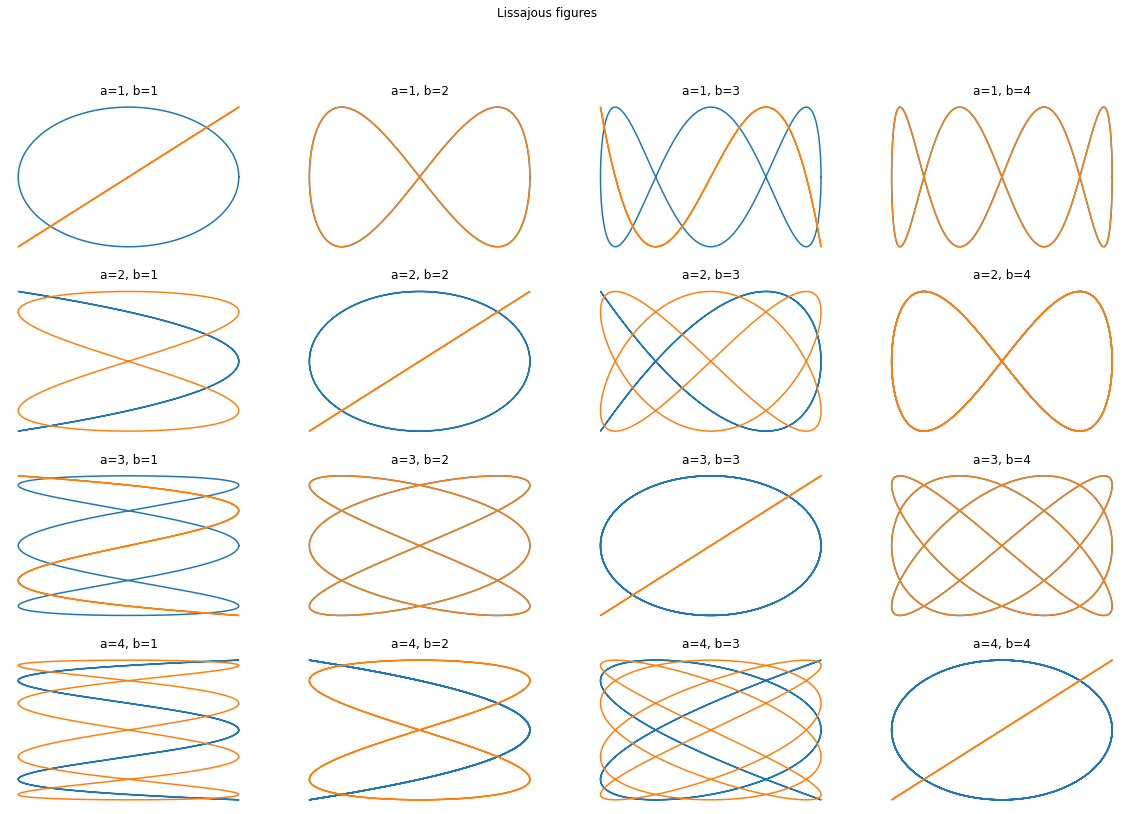

In [ ]:
# Готовим данные
t = np.linspace(0, 2*np.pi, 1000)

# Здесь все как обычно
fig = plt.figure(figsize=(20, 13))
fig.suptitle('Lissajous figures')

nrows = 4
ncols = 4

for a in range(1, nrows + 1):
    for b in range(1, ncols + 1):
        # Выбираем ячейку
        ax = fig.add_subplot(nrows, ncols, (a - 1) * ncols + b)
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos(a*t),
            np.sin(b*t),
        )
        ax.plot(
            np.sin(a*t),
            np.sin(b*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title(f'a={a}, b={b}')

plt.show()

А теперь, как это удобно делать:

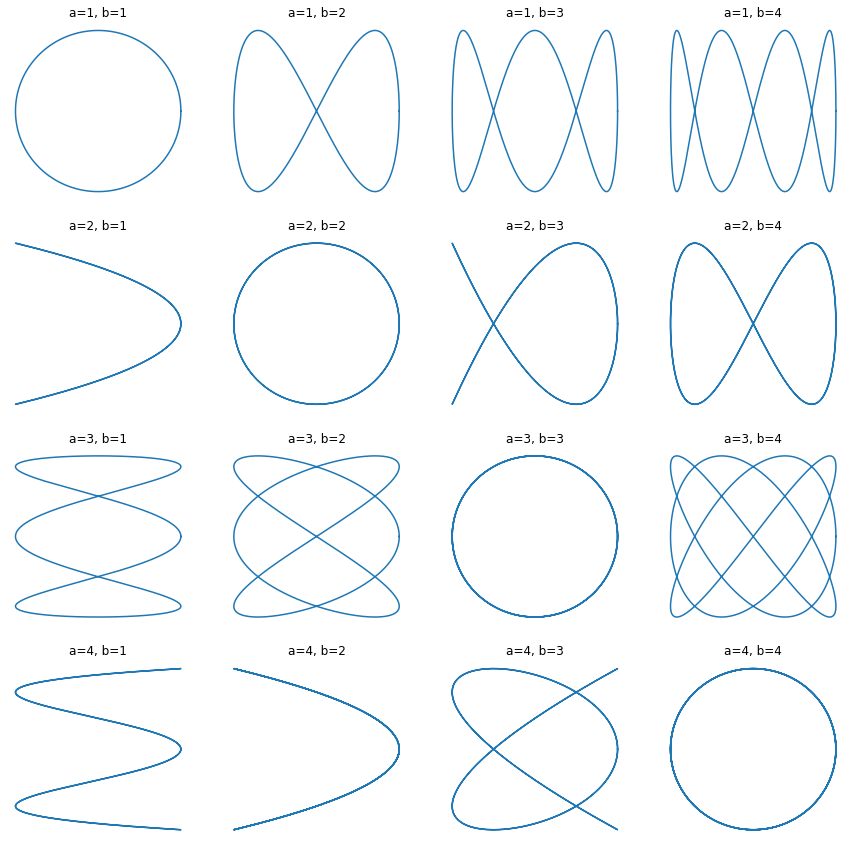

In [ ]:
t = np.linspace(0, 2*np.pi, 1000)

nrows = 4
ncols = 4

figure, axes = plt.subplots(nrows, ncols, figsize=(15,15))

for a in range(nrows):
    for b in range(ncols):
        # Выбираем ячейку
        ax = axes[a][b]
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos((a+1)*t),
            np.sin((b+1)*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title('a={}, b={}'.format(a+1, b+1))

plt.show()

Иногда хочется собрать несколько графиков на одном рисунке, но их размеры должны отличаться. Для этого надо использовать объект GridSpec. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in arccosh


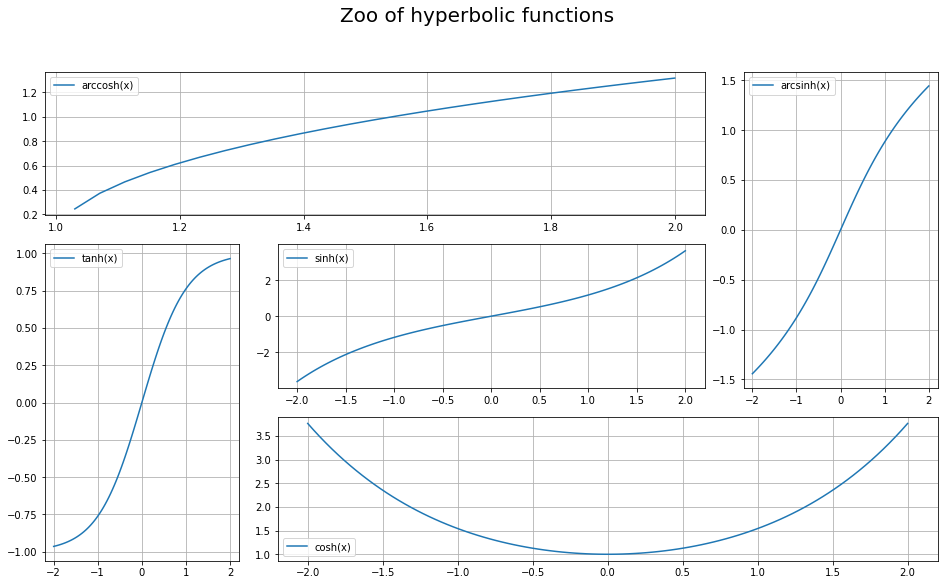

In [ ]:
from matplotlib import gridspec  # GridSpec определен там

# Создаем картинку
fig = plt.figure(figsize=(16, 9))
fig.suptitle('Zoo of hyperbolic functions', fontsize=20)

# Создаем "спеку"
spec = gridspec.GridSpec(nrows=3, ncols=4)
# В метод add_suplot можно передать slicing от спеки. 
# Тем самым создастся область рисования занимающая ячейки соответствующие slicing'у 
fig.add_subplot(spec[0, :3
                     ])  # Добавить область рисования занимающую первые три ячейки первой строки
fig.add_subplot(spec[:2, 3])
fig.add_subplot(spec[2, 1:])
fig.add_subplot(spec[1:, 0])
fig.add_subplot(spec[1, 1:3])

trig_funcs = [np.sinh, np.tanh, np.cosh, np.arcsinh, np.arccosh]
points = np.linspace(-2, 2, 100)

for ax, func in zip(fig.axes, trig_funcs[::-1]):
    ax.plot(
        points,
        func(points),
        label='{}(x)'.format(func.__name__)
    )
    # Выбрать самое "хорошее" расположение для легенды
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### 3.6. Координатные оси

В matplotlib оси координат являются элементом рисунка, а точнее контейнером типа Artist. Примеры - оси $x$, $y$ в декартовой системе координат, оси $r$, $\phi$ в полярной системе координат. Каждая ось содержит три группы графических примитивов: деления осей (ticks), подписи делений (tick lables), подписи осей (axis labels).

Деления на оси бывают главные и вспомогательные. Чтобы получить к ним доступ надо в методе get_ticks в аргумент which передавать 'major' или 'minor'. По умолчанию отображаются только major деления.

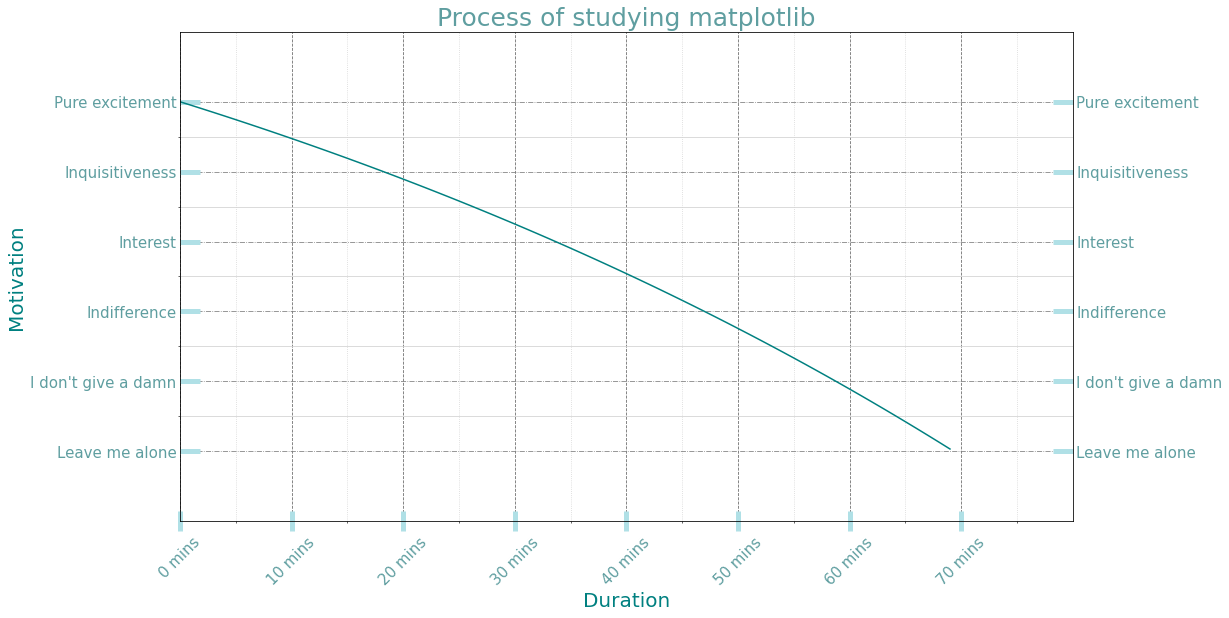

In [ ]:
fig = plt.figure(figsize=(16, 9))
# Здесь мы создаем мультиокно из 1 строки и 1 столбца  выбираем 1-ю ячейку
# Такой вот странный и часто используемый способ создать область рисования
ax = fig.add_subplot(111)
ax.set_title('Process of studying matplotlib', fontsize=25, color='cadetblue')

# Здесь все как обычно - рисуем линию
ax.plot(
    np.arange(70),
    2 - np.exp(0.01 * np.arange(70)),
    color='teal'
)

# Задаем положения вспомогательных делений на оси Х
ax.set_xticks(np.arange(5, 85, 10), minor=True)
# Задаем положения основных делений
ax.set_xticks(np.arange(0, 80, 10))
# Задаем диапазон значений x который будет отрисовываться. Обынчно он шире диапазона делений
ax.set_xlim(0, 80)
# Ставим подписи к основным делениям на оси x
ax.set_xticklabels(
    ['{} mins'.format(t) for t in range(0, 80, 10)],  # текст надписей
    rotation=45,  # угол поворота надписей
    fontsize=15,
    color='cadetblue'
)
# Настраиваем параметры основных делений на оси X
ax.tick_params(
    axis='x',  
    which='major',
    direction='inout', # деления будут пересекать ось 
    length=20,  # длина делений в точках
    width=5,  # ширина делений в точках
    color='powderblue',
    top=False, bottom=True,  # рисуем делениями только снизу
    labeltop=False, labelbottom=True  # рисуем подписи к делениям только снизу
)

# Для оси Y все настройки аналогичны
ax.set_yticks(np.arange(0.1, 1, 0.2), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(-0.2, 1.2)
ax.set_yticklabels(
    ['Leave me alone', 'I don\'t give a damn', 'Indifference', 'Interest', 'Inquisitiveness', 'Pure excitement'],
    fontsize=15,
    color='cadetblue'
)
ax.tick_params(
    axis='y', which='major',
    direction='in',
    length=20, width=5, color='powderblue',
    left=True, right=True,
    labelleft=True, labelright=True
)

# Делаем подписи к осям
ax.set_xlabel('Duration', color='teal', fontsize=20)
ax.set_ylabel('Motivation', color='teal', fontsize=20)

# Для основных делений оси x мы строим координатную сетку пунктирной линией
ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
# Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
# Аналогично настраиваются параметры для координатной сетки по оси Y
ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')

plt.show()

При всем том, что ноутбук получился очень большим, мы не обсудили еще очень много тем: глобальные настройки через rcParams, работа со шрифтами, палитры, специальный дизайн шкалы на температурной карте и т.д. и т.п. Если вам понадобятся такие возможности matplotlib, то пора садиться за [серьезные книжки](http://index-of.co.uk/Tutorials/Matplotlib%20for%20Python%20Developers.pdf) или даже [читать документацию](https://matplotlib.org/index.html).

## Галерея примеров - https://matplotlib.org/gallery/index.html